In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.naive_bayes import BernoulliNB,GaussianNB,MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("dummy_travel_data.csv")

In [7]:
df.head()

,ID,Surname,First Name,Department,Staff or Student,Date of first journey,Destination,Estimated CO2eq emission (please enter in kg),Travel mode
0,448,Nesbitt,Jacalyn,Mathematics and Statistics,Staff,2020-10-01,Monaco,158.082653,Flight
1,1913,Rybka,Donald,Meteorology,Staff,2020-10-01,Oslo,12.547799,Train
2,4663,Roy,Paulette,Computer Science,Student,2020-10-01,Madrid,191.373317,Flight
3,4346,Glass,Stephanie,Meteorology,Staff,2020-10-01,Brussels,52.199326,Flight
4,3689,Martinez,Georgia,Meteorology,Staff,2020-10-02,Amsterdam,55.100420,Flight


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             5000 non-null   int64  
 1   Surname                                        5000 non-null   object 
 2   First Name                                     5000 non-null   object 
 3   Department                                     5000 non-null   object 
 4   Staff or Student                               5000 non-null   object 
 5   Date of first journey                          5000 non-null   object 
 6   Destination                                    5000 non-null   object 
 7   Estimated CO2eq emission (please enter in kg)  5000 non-null   float64
 8   Travel mode                                    5000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 351.

In [9]:
# Loop through each column and display the value counts
for column in df.columns:
    print(f'Column: {column}')
    value_counts = df[column].value_counts()
    print(value_counts)
    print("\n")

Column: ID
ID
448     1
831     1
18      1
4523    1
1000    1
       ..
4996    1
1925    1
1154    1
3994    1
852     1
Name: count, Length: 5000, dtype: int64


Column: Surname
Surname
Jones       90
Williams    56
Smith       54
Perez       45
Miller      44
            ..
Small        4
Rayford      4
Kline        4
Ray          4
Squires      4
Name: count, Length: 353, dtype: int64


Column: First Name
First Name
Robert        118
David         116
John           88
Richard        80
James          68
             ... 
Altagracia      6
Lillian         6
Rhonda          5
Yolanda         4
Jorge           4
Name: count, Length: 265, dtype: int64


Column: Department
Department
Meteorology                   3235
Mathematics and Statistics    1045
Computer Science               629
Walker Institute                91
Name: count, dtype: int64


Column: Staff or Student
Staff or Student
Staff      3012
Student    1988
Name: count, dtype: int64


Column: Date of first journey
Date 

In [27]:
import pandas as pd

# Assuming you have your DataFrame 'df' as defined earlier

# Define a function to capitalize all letters in a string
def capitalize_all_letters(s):
    if isinstance(s, str):
        return s.upper()
    else:
        return s

# Apply the function to all string columns
df = df.applymap(capitalize_all_letters)

# Display the DataFrame with all letters capitalized
print(df)


        ID   Surname First Name                  Department Staff or Student   
0      448   NESBITT    JACALYN  MATHEMATICS AND STATISTICS            STAFF  \
1     1913     RYBKA     DONALD                 METEOROLOGY            STAFF   
2     4663       ROY   PAULETTE            COMPUTER SCIENCE          STUDENT   
3     4346     GLASS  STEPHANIE                 METEOROLOGY            STAFF   
4     3689  MARTINEZ    GEORGIA                 METEOROLOGY            STAFF   
...    ...       ...        ...                         ...              ...   
4995  1659   MCVEIGH    ANTHONY                 METEOROLOGY            STAFF   
4996  4882   BENNETT      JANET                 METEOROLOGY            STAFF   
4997  4334     YOUNG    BARBARA  MATHEMATICS AND STATISTICS            STAFF   
4998   362  VEENSTRA      JAMES                 METEOROLOGY          STUDENT   
4999   852    DOCTOR        AMY                 METEOROLOGY            STAFF   

     Date of first journey Destination 

In [28]:
import pandas as pd

# Assuming you have your DataFrame 'df' as defined earlier

# Round the "Estimated CO2eq emission (please enter in kg)" column to 3 decimal places
df['Estimated CO2eq emission (please enter in kg)'] = df['Estimated CO2eq emission (please enter in kg)'].round(3)

# Display the DataFrame with the column rounded to 3 decimal places
print(df)


        ID   Surname First Name                  Department Staff or Student   
0      448   NESBITT    JACALYN  MATHEMATICS AND STATISTICS            STAFF  \
1     1913     RYBKA     DONALD                 METEOROLOGY            STAFF   
2     4663       ROY   PAULETTE            COMPUTER SCIENCE          STUDENT   
3     4346     GLASS  STEPHANIE                 METEOROLOGY            STAFF   
4     3689  MARTINEZ    GEORGIA                 METEOROLOGY            STAFF   
...    ...       ...        ...                         ...              ...   
4995  1659   MCVEIGH    ANTHONY                 METEOROLOGY            STAFF   
4996  4882   BENNETT      JANET                 METEOROLOGY            STAFF   
4997  4334     YOUNG    BARBARA  MATHEMATICS AND STATISTICS            STAFF   
4998   362  VEENSTRA      JAMES                 METEOROLOGY          STUDENT   
4999   852    DOCTOR        AMY                 METEOROLOGY            STAFF   

     Date of first journey Destination 

In [29]:
df_clean = df.drop_duplicates(subset=['ID', 'Date of first journey'])

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   ID                                             5000 non-null   int64  
 1   Surname                                        5000 non-null   object 
 2   First Name                                     5000 non-null   object 
 3   Department                                     5000 non-null   object 
 4   Staff or Student                               5000 non-null   object 
 5   Date of first journey                          5000 non-null   object 
 6   Destination                                    5000 non-null   object 
 7   Estimated CO2eq emission (please enter in kg)  5000 non-null   float64
 8   Travel mode                                    5000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 351.

In [31]:
df_clean.shape

(5000, 9)

In [32]:
df_clean.describe()

,ID,Estimated CO2eq emission (please enter in kg)
count,5000.000000,5000.000000
mean,2499.500000,565.165157
std,1443.520003,1048.904366
min,0.000000,3.953000
25%,1249.750000,10.166000
50%,2499.500000,80.085000
75%,3749.250000,224.711000
max,4999.000000,5063.000000


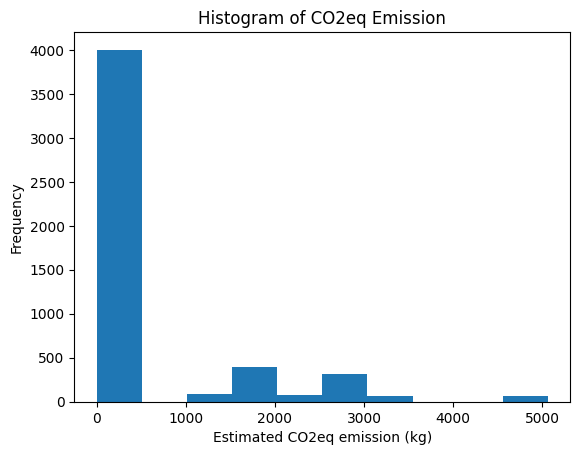

In [33]:
import matplotlib.pyplot as plt
df_clean['Estimated CO2eq emission (please enter in kg)'].plot(kind='hist', bins=10)
plt.xlabel('Estimated CO2eq emission (kg)')
plt.ylabel('Frequency')
plt.title('Histogram of CO2eq Emission')
plt.show()


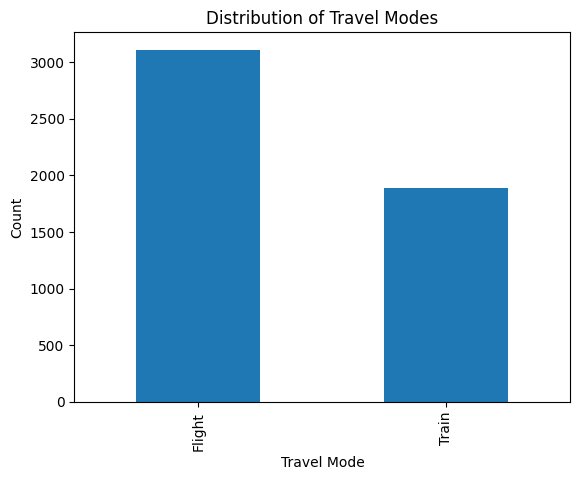

In [20]:
df_clean['Travel mode'].value_counts().plot(kind='bar')
plt.xlabel('Travel Mode')
plt.ylabel('Count')
plt.title('Distribution of Travel Modes')
plt.show()


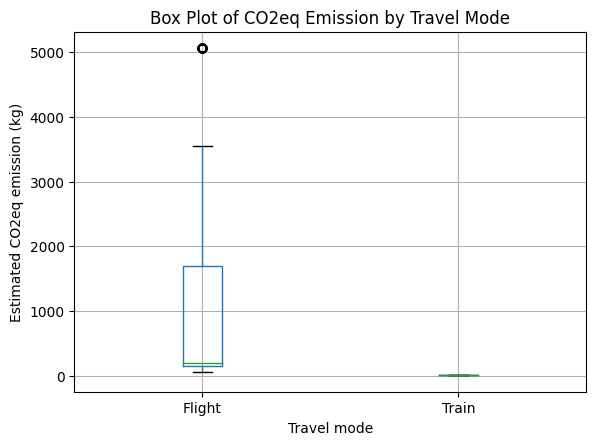

In [21]:
df_clean.boxplot(column='Estimated CO2eq emission (please enter in kg)', by='Travel mode')
plt.ylabel('Estimated CO2eq emission (kg)')
plt.title('Box Plot of CO2eq Emission by Travel Mode')
plt.suptitle('')  # To remove the auto-generated title
plt.show()


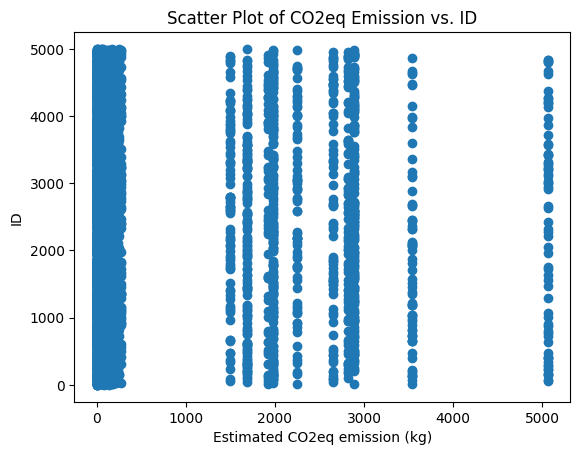

In [23]:
plt.scatter(df['Estimated CO2eq emission (please enter in kg)'], df['ID'])
plt.xlabel('Estimated CO2eq emission (kg)')
plt.ylabel('ID')
plt.title('Scatter Plot of CO2eq Emission vs. ID')
plt.show()
